<a href="https://colab.research.google.com/github/Chirag314/EDA/blob/main/Feature_engineering_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This notebook is produced using the reference from Kaggle
https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook

In [1]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Check train data
df_train = pd.read_csv('train.csv')
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
# Check the sale price
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

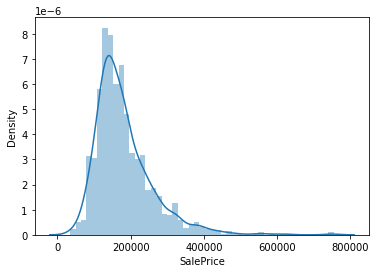

In [4]:
# Plot the histogram of sale price
sns.distplot(df_train['SalePrice'])

In [5]:
# Print skewness and kurtois
print("Skewness :%f" % df_train['SalePrice'].skew())
print("Kurtosis : %f" % df_train['SalePrice'].kurt())

Skewness :1.882876
Kurtosis : 6.536282


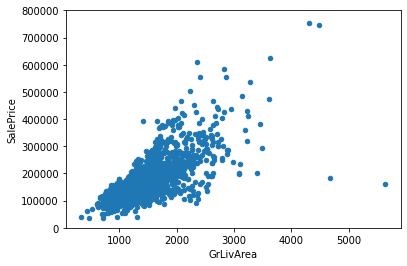

In [6]:
# Find relationship of Sale price with other numerical variables
# From graph it sale price and living area are positively corelated.
var='GrLivArea'
data= pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

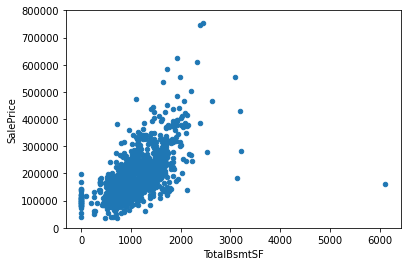

In [7]:
# Check total basement sqft with sale price relation
# Total basement sqft is also strong co relation with sale price
data=pd.concat([df_train['SalePrice'],df_train['TotalBsmtSF']],axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice',ylim=(0,800000))

(-0.5, 9.5, 0.0, 800000.0)

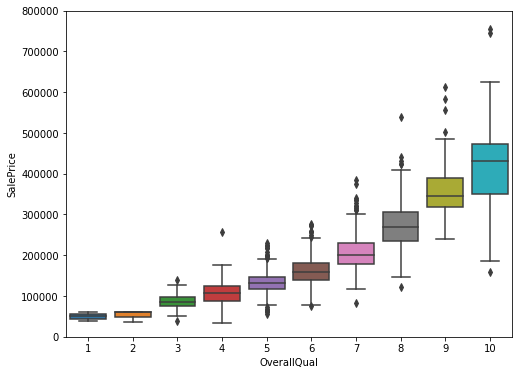

In [8]:
#CHeck relation ship with categorical variables.
data=pd.concat([df_train['SalePrice'],df_train['OverallQual']],axis=1)
f,ax = plt.subplots(figsize=(8,6))
fig=sns.boxplot(x='OverallQual',y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text major ticklabel objects>)

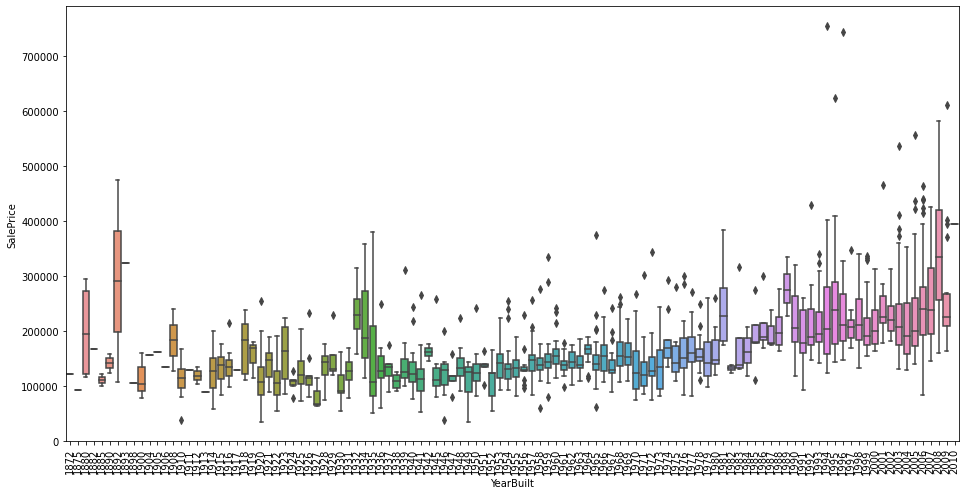

In [9]:
var='YearBuilt'
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
f,ax = plt.subplots(figsize=(16,8))
fig=sns.boxplot(x=var, y='SalePrice',data=data)
fig.axis(ymin=0,yman=800000)
plt.xticks(rotation=90)

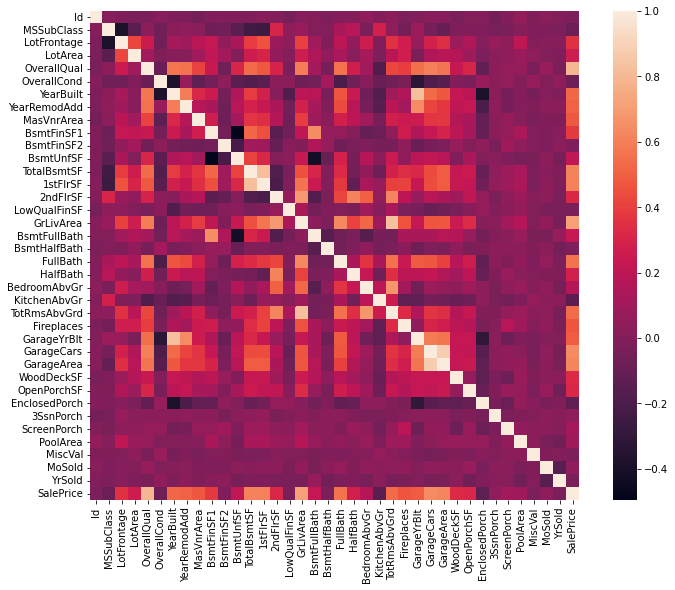

In [10]:
# Check corelation matrix
corrmat=df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=1,square=True)

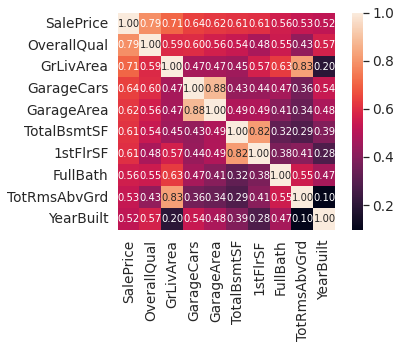

In [11]:
# Zoom into correlation matrix
k=10 # Number of variables in heatmap
cols=corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm=np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm=sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size':10}, yticklabels=cols.values,xticklabels=cols.values)
plt.show()
#'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
#'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
#'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').
#'FullBath'?? Really?
#'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. Is this dataset from Chernobyl?
#Ah... 'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'.

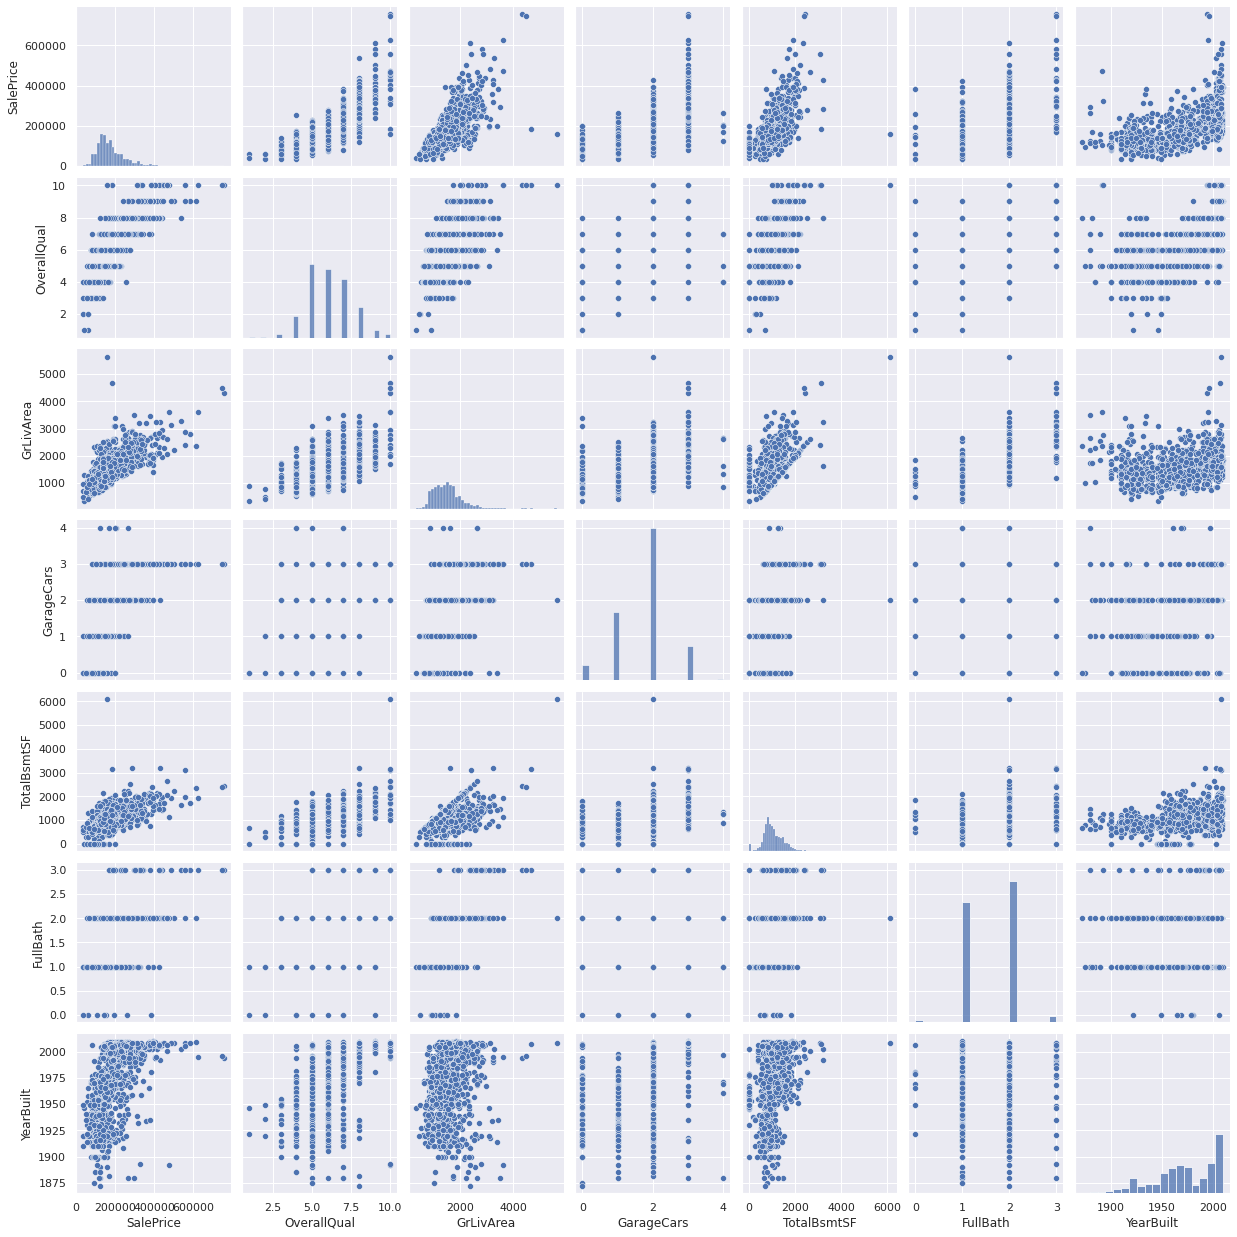

In [12]:
#scatter plot
sns.set()
cols=['SalePrice','OverallQual', 'GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(df_train[cols],size=2.5)
plt.show()


In [22]:
#missing data 
total=df_train.isnull().sum().sort_values(ascending=False)
percent=(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['total','Percent'])
missing_data.head(20)


,total,Percent
Electrical,1,0.000685
Fireplaces,0,0.000000
1stFlrSF,0,0.000000
2ndFlrSF,0,0.000000
LowQualFinSF,0,0.000000
GrLivArea,0,0.000000
BsmtFullBath,0,0.000000
BsmtHalfBath,0,0.000000
FullBath,0,0.000000
HalfBath,0,0.000000


In [24]:
# WHen more than 15% data is missing , delete the variable.
# Dealing with missing data
df_train = df_train.drop((missing_data[missing_data['total'] > 1]).index,1)
df_train=df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

0

In [26]:
# Find out outliers by standardizing the data

saleprice_scaled=StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
low_range=saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range=saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range(low) of distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range(low) of distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


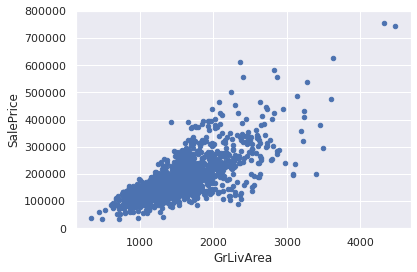

In [30]:
#Bivariate analysis of saleprice/grlivarea
var='GrLivArea'
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

In [29]:
# Two points in right side dont follow the trend. They might be agricultural land 
#which is of low value therefore we should delete them
#Deleting points
df_train.sort_values(by='GrLivArea',ascending=False)[:2]
df_train=df_train.drop(df_train[df_train['Id']==1299].index)
df_train=df_train.drop(df_train[df_train['Id']==524].index)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


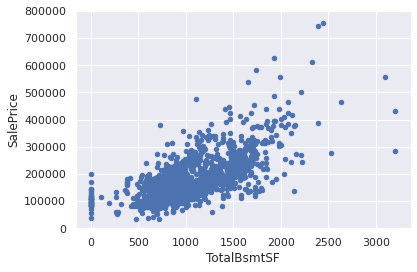

In [31]:
#Bivariate analysls
var="TotalBsmtSF"
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

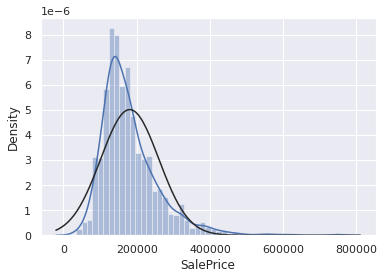

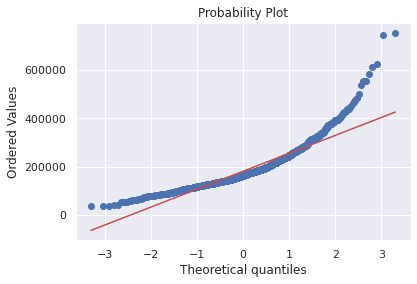

In [32]:
# Check normality
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['SalePrice'],plot=plt)

'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.A simple data transformation can solve the problem.  in case of positive skewness, log transformations usually works well.

In [33]:
# Applying log transformation
df_train['SalePrice']=np.log(df_train['SalePrice'])
df_train['SalePrice'].head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

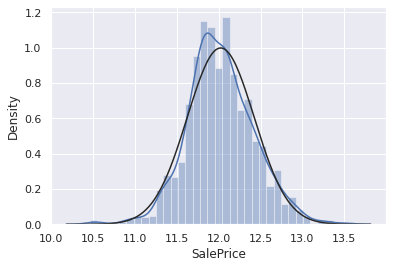

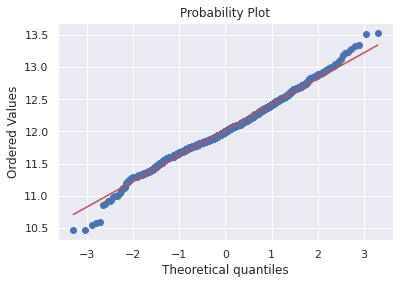

In [34]:
#Transformed histogram and normal probability plots
sns.distplot(df_train['SalePrice'],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['SalePrice'],plot=plt)

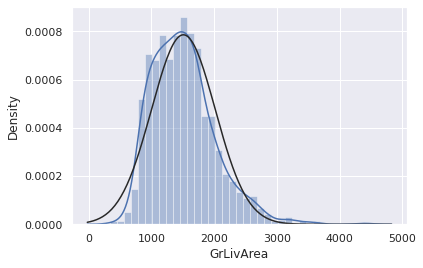

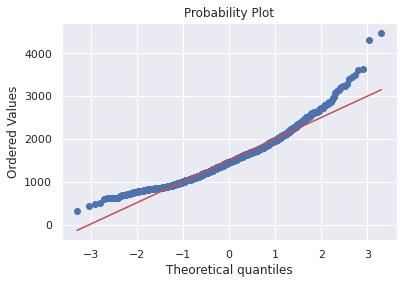

In [36]:
# GrLivingArea check
sns.distplot(df_train['GrLivArea'],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['GrLivArea'],plot=plt)

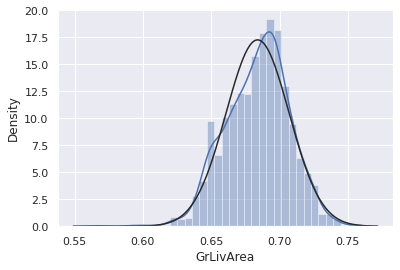

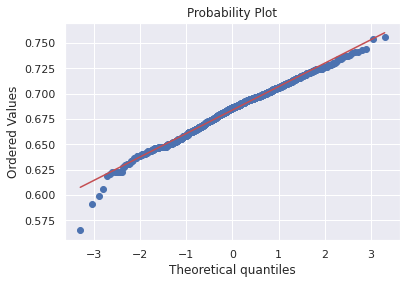

In [39]:
#transform data
df_train['GrLivArea']=np.log(df_train['GrLivArea'])
#Transformed histogram and pbro plot
sns.distplot(df_train['GrLivArea'],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['GrLivArea'],plot=plt)

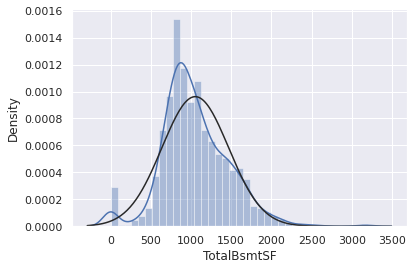

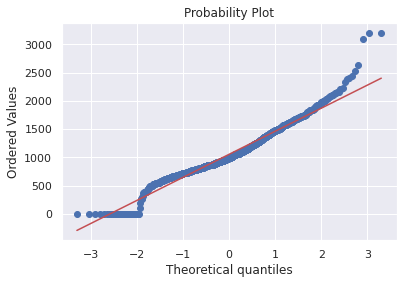

In [40]:
# Histogram and prob plot for other variables
sns.distplot(df_train['TotalBsmtSF'],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['TotalBsmtSF'],plot=plt)

A significant number of observations with value zero (houses without basement).The value zero doesn't allow us to do log transformations.We will have to create a derived variable 

In [43]:
# Create a new column for basement
df_train['HasBsmt']=pd.Series(len(df_train['TotalBsmtSF']),index=df_train.index)
df_train['HasBsmt']=0
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt']=1
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF']=np.log(df_train['TotalBsmtSF'])

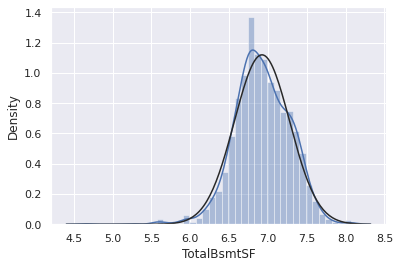

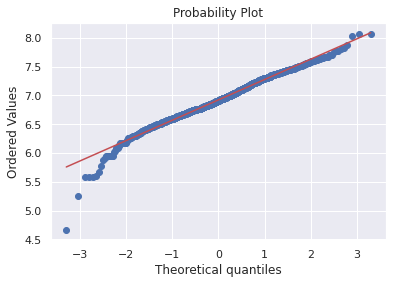

In [46]:
#Histogram and normal plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'],plot=plt)

to test homoscedasticity for two metric  graphically.Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

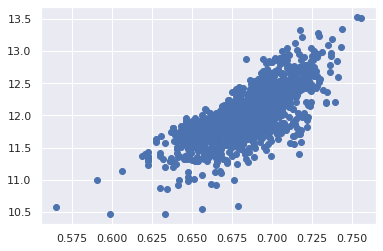

In [47]:
#scatter plot
plt.scatter(df_train['GrLivArea'],df_train['SalePrice'])

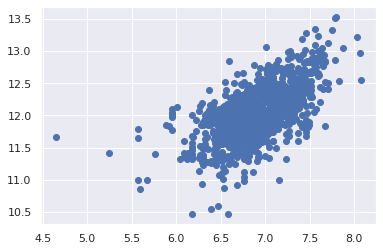

In [50]:
#scatter plot of saleprice vs totalbsmtsf
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'],df_train[df_train['TotalBsmtSF']>0]['SalePrice'])

In [51]:
# Convert categorical variables into dummy variables
df_train=pd.get_dummies(df_train)